<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
# %pip install --upgrade plotly

###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [3]:
pd.options.display.float_format="{:,.2f}".format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [4]:
data= pd.read_csv("boston.csv")

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
#  lets see how many colums and rows are there in the dataset
data.shape

(506, 15)

In [6]:
# now, lets see the datatypes of each columns (what kind of data does each column comprises of on our dataset)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [7]:
# now, lets look at some data samples to get better understanding of the data
data.sample(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
392,392,11.58,0.00,18.10,0.00,0.70,5.04,97.00,1.77,24.00,666.00,20.20,396.90,25.68,9.70
190,190,0.09,45.00,3.44,0.00,0.44,6.95,21.50,6.48,5.00,398.00,15.20,377.68,5.10,37.00
450,450,6.72,0.00,18.10,0.00,0.71,6.75,92.60,2.32,24.00,666.00,20.20,0.32,17.44,13.40


In [8]:
# lets have a glance at statistical description of data
data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,252.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,146.21,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.00,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,126.25,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,252.50,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,378.75,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,505.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [9]:
# it is very important to understand what kind of data we are dealing with so, lets look at the column names
data.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

## Data Cleaning - Check for Missing Values and Duplicates

In [10]:
# since, we have explore the data thoroughly above, now lets find out if there are any null values or duplicate values in the dataset.
data.isna().values.any()

False

In [11]:
#checking for duplicates
data.duplicated().values.any()

False

## Descriptive Statistics

**Challenge**

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature?
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [12]:
data.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,252.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,146.21,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.00,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,126.25,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,252.50,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,378.75,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,505.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [13]:
print(f"There are {data.describe().PTRATIO[2]:.2f} students per teacher on average.")

There are 2.16 students per teacher on average.


In [14]:
print(f"The average price of home in the dataset is: {data.describe().PRICE[1]:.2f}")

The average price of home in the dataset is: 22.53


In [15]:
#discusssing about the attribute CHAS
print("The 'CHAS' attribute within our dataset pertains to a binary categorical value, solely taking on the values 0 or 1. \nThis attribute serves as an indicator regarding the presence or absence of a significant characteristic related to the Charles River within the area under consideration or evaluation.")
print("A value of 1 signifies the existence of a distinct feature denoting the flow or adjacency of the Charles River within the evaluated area. \nOn the contrary, a value of 0 denotes the absence or lack of such characteristics, suggesting the absence of any discernible connection with the Charles River within that specific area.")


The 'CHAS' attribute within our dataset pertains to a binary categorical value, solely taking on the values 0 or 1. 
This attribute serves as an indicator regarding the presence or absence of a significant characteristic related to the Charles River within the area under consideration or evaluation.
A value of 1 signifies the existence of a distinct feature denoting the flow or adjacency of the Charles River within the evaluated area. 
On the contrary, a value of 0 denotes the absence or lack of such characteristics, suggesting the absence of any discernible connection with the Charles River within that specific area.


In [16]:
# maximum and minium value of CHAS attribute
print("The 'CHAS' attribute in the dataset is a binary categorical variable that represents whether a tract bounds the Charles River or not. \nIn a binary context, the minimum and maximum values typically refer to the lowest and highest values present in the dataset.")
print("\n")
print("The minimum value for the 'CHAS' attribute is 0, indicating that the tract does not bound the Charles River.")
print("The maximum value for the 'CHAS' attribute is 1, representing tracts that do bound the Charles River.")
print("\n")
print("This binary nature of the 'CHAS' attribute makes the minimum and maximum values straightforward: 0 signifies the absence of a river boundary, \nwhile 1 denotes the presence of a boundary along the Charles River.")

The 'CHAS' attribute in the dataset is a binary categorical variable that represents whether a tract bounds the Charles River or not. 
In a binary context, the minimum and maximum values typically refer to the lowest and highest values present in the dataset.


The minimum value for the 'CHAS' attribute is 0, indicating that the tract does not bound the Charles River.
The maximum value for the 'CHAS' attribute is 1, representing tracts that do bound the Charles River.


This binary nature of the 'CHAS' attribute makes the minimum and maximum values straightforward: 0 signifies the absence of a river boundary, 
while 1 denotes the presence of a boundary along the Charles River.


In [17]:
# maximum and the minimum number of rooms per dwelling in the dataset
print(f"The maximum number of rooms per dwelling in the dataset is: {data.RM.max()}")
print("\n")
print(f"The minimum number of rooms per dwelling in the dataset is: {data.RM.min()}")

The maximum number of rooms per dwelling in the dataset is: 8.78


The minimum number of rooms per dwelling in the dataset is: 3.561


## Visualise the Features

**Challenge**: Having looked at some descriptive statistics, visualise the data for your model. Use [Seaborn's `.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to create a bar chart and superimpose the Kernel Density Estimate (KDE) for the following variables:
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways.

Try setting the `aspect` parameter to `2` for a better picture.

What do you notice in the distributions of the data?

In [18]:
data.sample(1)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
490,490,0.21,0.00,27.74,0.00,0.61,5.09,98.00,1.82,4.00,711.00,20.10,318.43,29.68,8.10


In [19]:
#visualization of data using Seaborn's displot
# since we are creating bar chart for each attribute mentioned above: PRICE, RM, DIS, RAD, it would be better to create displot for them individually and then superimpose KDE on top of their bar plot

# plt.figure(figsize=(16,8), dpi=2)
# columns = ["PRICE", "RM", "DIS", "RAD"]
# with sns.axes_style("darkgrid"):
#   for i in columns:
#     a =sns.displot(data= data, x= data[i], kde= True, bins= 50, aspect=2)
#     a.set_axis_labels(i, "Number of Homes")
#     if i=="PRICE":
#       plt.title(f"Avergae Home Value in Boston in 1970s is: {data.PRICE.mean():.2}")
#     if i=="RM":
#       plt.title(f"'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}")
#     if i=="DIS":
#       plt.title(f"Distance to Employment Centres. Average: {(data.DIS.mean()):.2}")
#     if i=="RAD":
#       plt.title(f"Accessibility to Highways")


#### House Prices 💰

Text(13.819444444444445, 0.5, 'Number of Houses')

<Figure size 3200x1600 with 0 Axes>

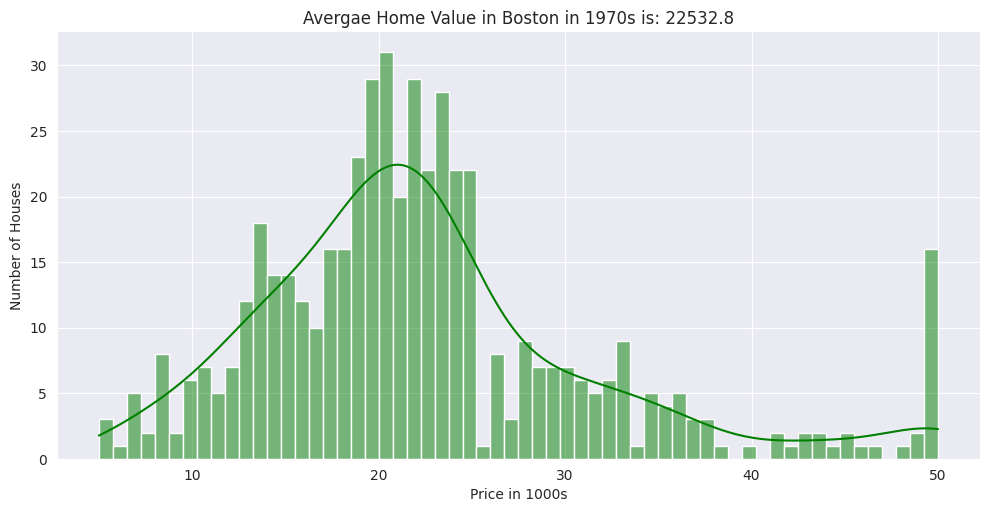

In [20]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.displot(data=data, x=data.PRICE, aspect=2, kde=True, color="green", bins=60)
plt.title(f"Avergae Home Value in Boston in 1970s is: {1000*data.PRICE.mean():.6}")
plt.xlabel("Price in 1000s")
plt.ylabel("Number of Houses")

#### Distance to Employment - Length of Commute 🚗

Text(13.819444444444445, 0.5, 'Number of Houses')

<Figure size 3200x1600 with 0 Axes>

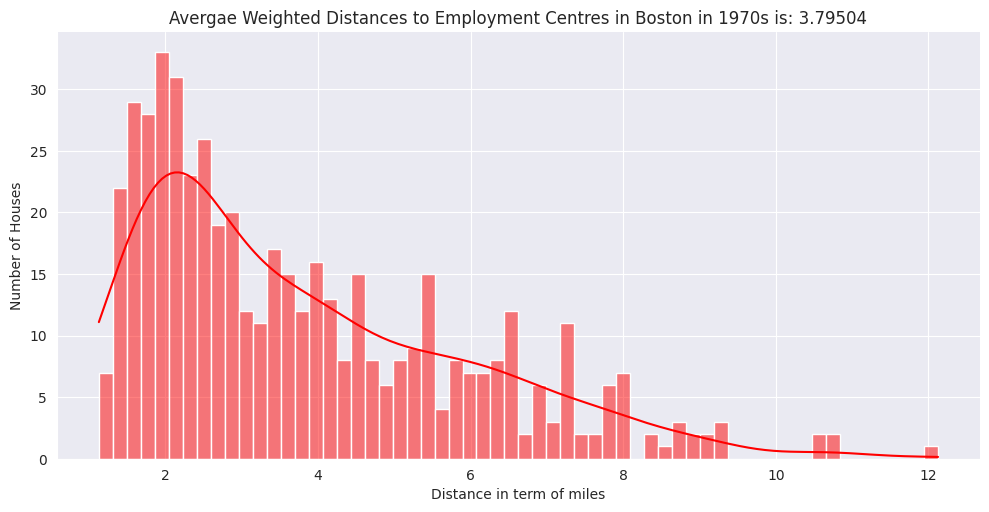

In [21]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.displot(data=data, x=data.DIS, aspect=2, kde=True, color="red", bins=60)
plt.title(f"Avergae Weighted Distances to Employment Centres in Boston in 1970s is: {data.DIS.mean():.6}")
plt.xlabel("Distance in term of miles")
plt.ylabel("Number of Houses")

#### Number of Rooms

Text(13.819444444444445, 0.5, 'Number of Houses')

<Figure size 3200x1600 with 0 Axes>

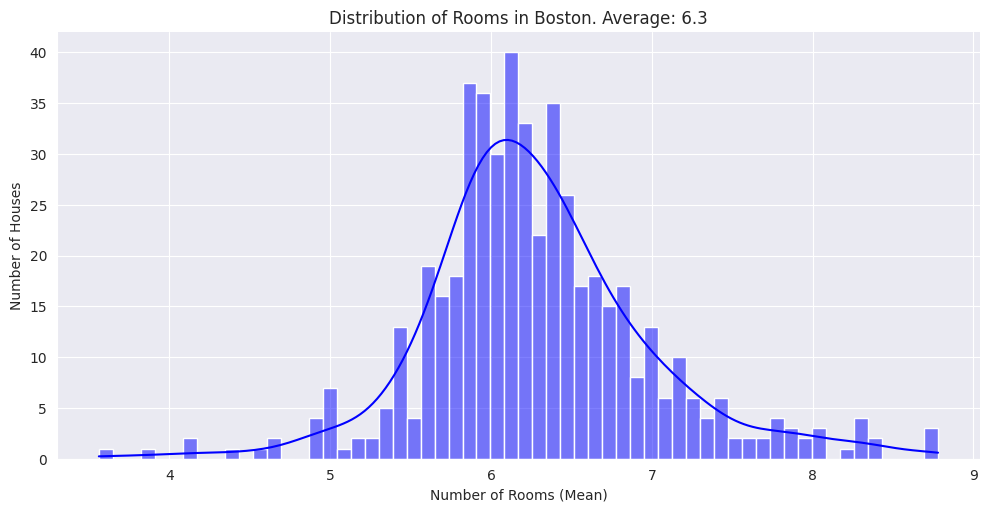

In [22]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.displot(data=data, x=data.RM, aspect=2, kde=True, color="blue", bins=60)
plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel("Number of Rooms (Mean)")
plt.ylabel("Number of Houses")

#### Access to Highways 🛣

(1.0, 24.0)

<Figure size 3200x1600 with 0 Axes>

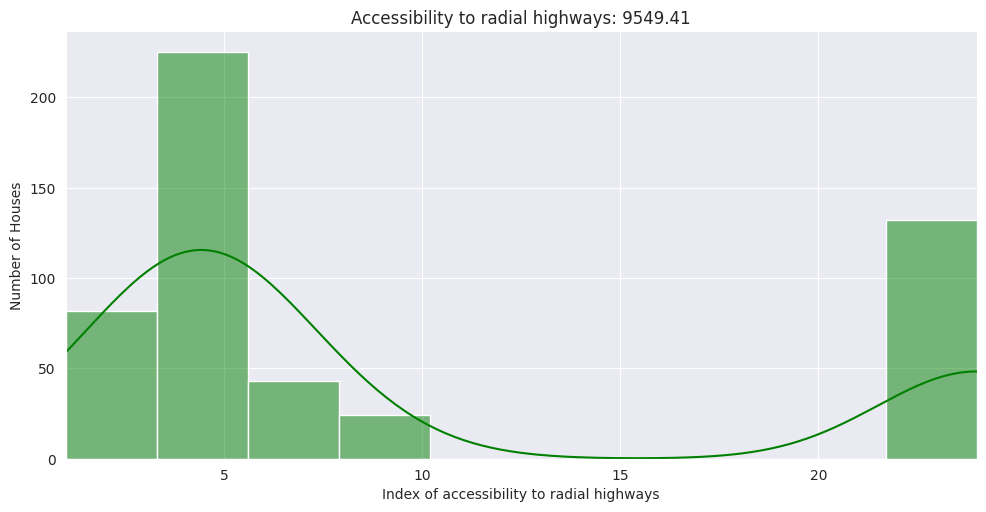

In [23]:
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("darkgrid"):
  sns.displot(data=data, x=data.RAD, aspect=2, kde=True, color="green", bins=10, )
plt.title(f"Accessibility to radial highways: {1000*data.RAD.mean():.6}")
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Number of Houses")
plt.xlim(data.RAD.min(), data.RAD.max())

#### Next to the River? ⛵️

**Challenge**

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it. The bar chart should look something like this:

<img src=https://i.imgur.com/AHwoQ6l.png height=350>

You can make your life easier by providing a list of values for the x-axis (e.g., `x=['No', 'Yes']`)

In [24]:
df_CHAS =  pd.DataFrame(data["CHAS"].value_counts())
df_CHAS.reset_index(inplace=True)

fig = px.bar(df_CHAS, x=['No', 'Yes'], y="CHAS", color=df_CHAS.CHAS)
fig.update_layout(title="Area has traits of Charler River or not?", xaxis_title="YES mean it has traits \nNo means it does not have any traits of river.", yaxis_title="Number of Houses", coloraxis_showscale=False)

In [25]:
df_CHAS

,index,CHAS
0,0.00,471
1,1.00,35


<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data

### Run a Pair Plot

**Challenge**

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices?

Run a [Seaborn `.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) to visualise all the relationships at the same time. Note, this is a big task and can take 1-2 minutes! After it's finished check your intuition regarding the questions above on the `pairplot`.

In [26]:
data.sample(6)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
287,287,0.04,52.50,5.32,0.00,0.41,6.21,31.30,7.32,6.00,293.00,16.60,396.90,7.14,23.20
315,315,0.25,0.00,9.90,0.00,0.54,5.71,77.70,3.94,4.00,304.00,18.40,396.42,11.50,16.20
227,227,0.41,0.00,6.20,0.00,0.50,7.16,79.90,3.22,8.00,307.00,17.40,372.08,6.36,31.60
4,4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20
21,21,0.85,0.00,8.14,0.00,0.54,5.96,89.20,4.01,4.00,307.00,21.00,392.53,13.83,19.60
473,473,4.65,0.00,18.10,0.00,0.61,6.98,67.60,2.53,24.00,666.00,20.20,374.68,11.66,29.80


### **1) What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?**

### Answer=> Well, I think that decrease in distance to employment increases the pollution. Let me explain why.A shorter distance to employment centers (lower DIS) might be associated with higher pollution levels (higher NOX) due to potential industrial or commercial activities present in those areas."This implies a positive relationship or correlation, suggesting that as the distance to employment centers decreases (people live closer to employment centers), the pollution level (NOX) might increase due to various sources associated with those areas."""

### **2) What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?**
### Answer=>  Generally, a higher number of rooms in a house (RM) might correspond to a higher home value (PRICE). More rooms often signify larger or more spacious homes, which tend to be more desirable and thus have higher market values.

### **3)What about the amount of poverty in an area (LSTAT) and home prices?**
### Answer=> A higher percentage of lower-status population (LSTAT) in an area might correspond to lower home prices (PRICE). Areas with a higher proportion of lower-income residents may have homes that are comparatively more affordable, resulting in lower median home values.

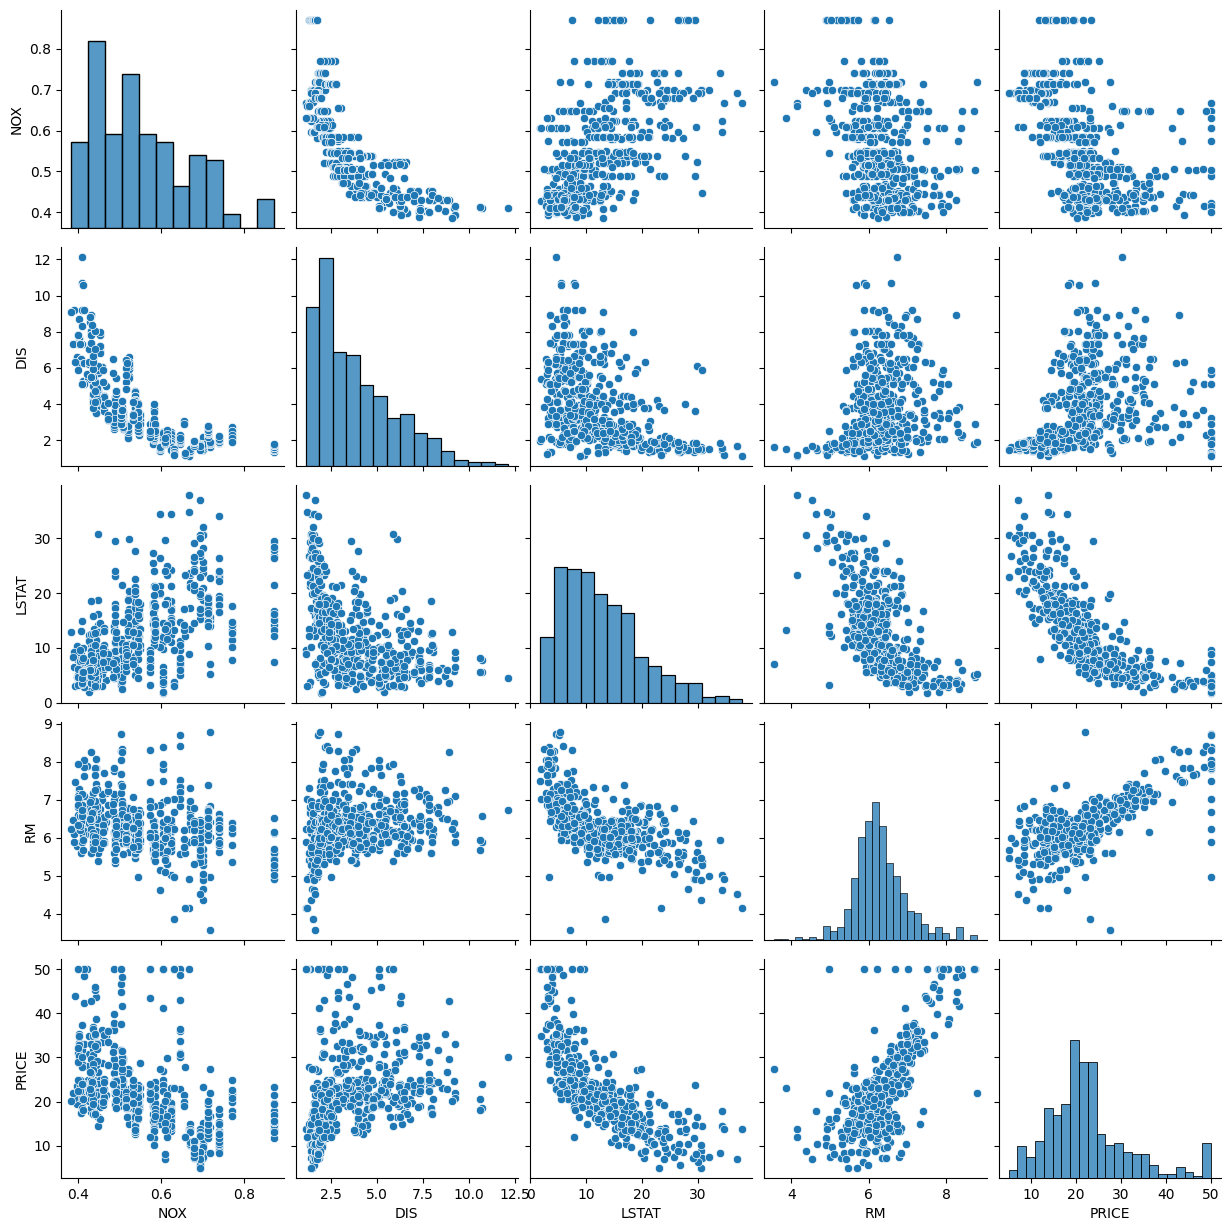

In [27]:
# running pairplot to visualize multiple variables i.e. NOX, DIS, LSTAT, RM, PRICE
# A pairplot is a visualization tool in data analysis that helps us understand relationships between multiple variables in a dataset. When we have many different variables, a pairplot allows us to examine the pairwise relationships between these variables.

fig = sns.pairplot(data=data[["NOX","DIS","LSTAT","RM","PRICE"]])

**Challenge**

Use [Seaborn's `.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

Try adding some opacity or `alpha` to the scatter plots using keyword arguments under `joint_kws`.

#### Distance from Employment vs. Pollution

**Challenge**:

Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases?

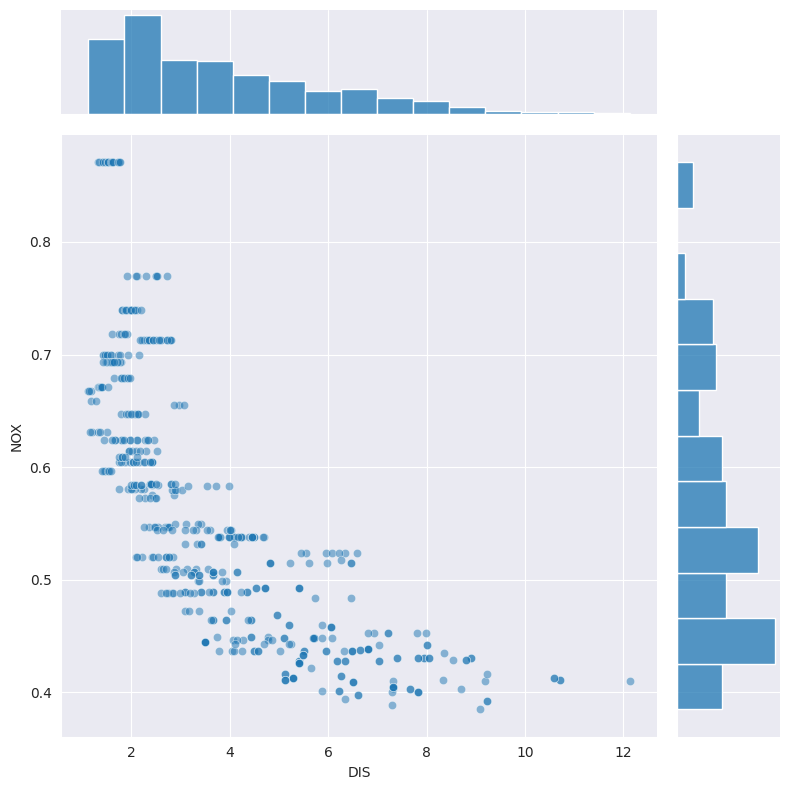

In [28]:
# creating jointplot for DIS and NOX

with sns.axes_style("darkgrid"):
  fig = sns.jointplot(data= data, x="DIS", y="NOX", kind="scatter",joint_kws={'alpha':0.5}, height=8)


#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

**Challenge**:

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

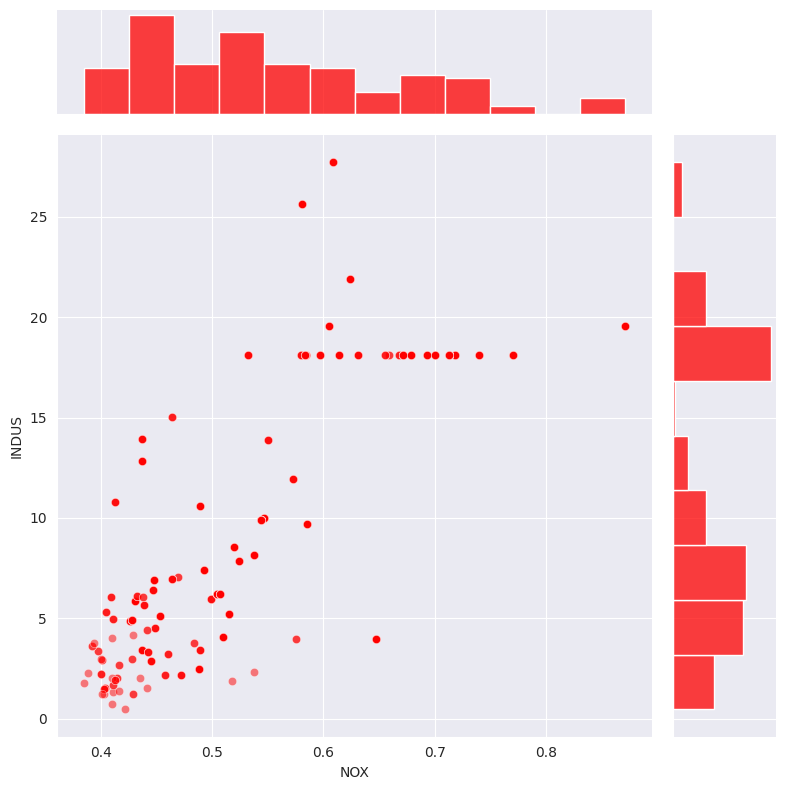

In [29]:
# creating jointplot for INDUS vs NOX

with sns.axes_style("darkgrid"):
  fig = sns.jointplot(data= data, x="NOX", y="INDUS", color="red",kind="scatter",joint_kws={'alpha':0.5}, height=8)


#### % of Lower Income Population vs Average Number of Rooms

**Challenge**

Compare LSTAT (proportion of lower-income population) with RM (number of rooms) using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

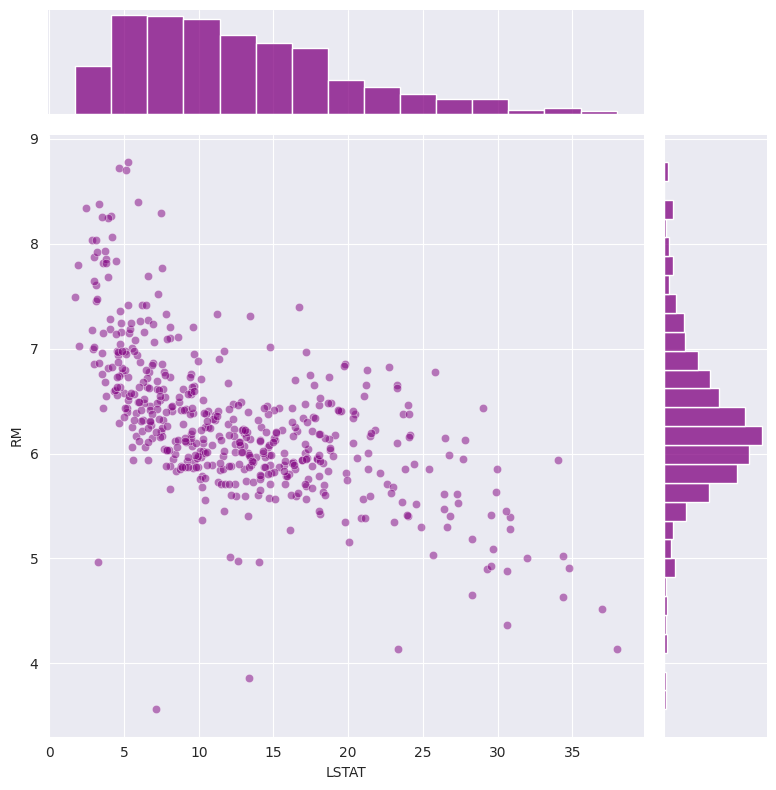

In [30]:
# creating jointplot for LSTAT vs RM

with sns.axes_style("darkgrid"):
  fig = sns.jointplot(data= data, x="LSTAT", y="RM",color="purple", kind="scatter",joint_kws={'alpha':0.5}, height=8)


#### % of Lower Income Population versus Home Price

**Challenge**

Compare LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

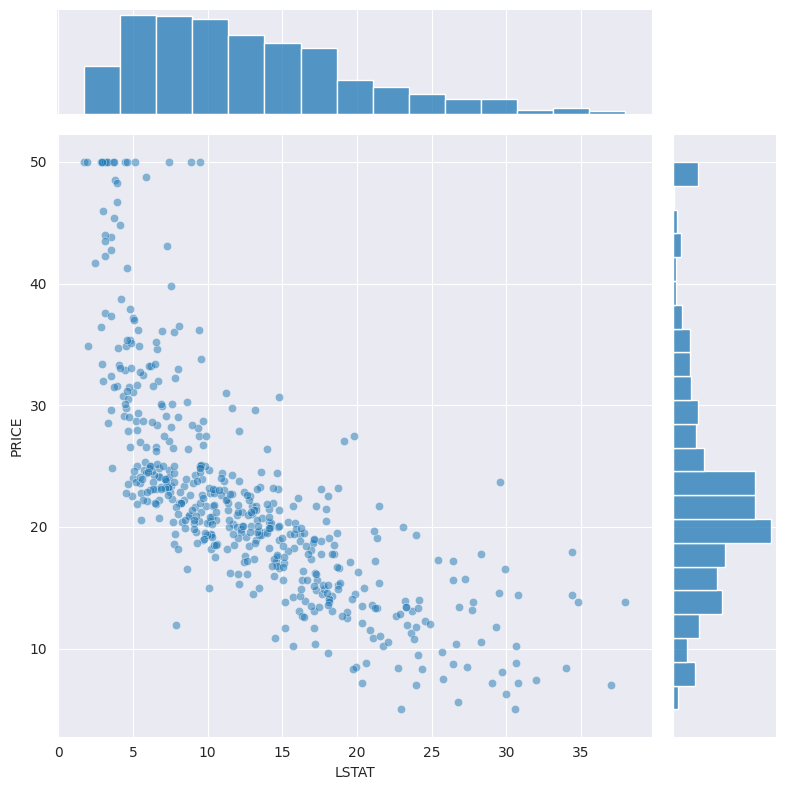

In [31]:
# creating jointplot for LSTAT vs PRICE

with sns.axes_style("darkgrid"):
  fig = sns.jointplot(data= data, x="LSTAT", y="PRICE", kind="scatter",joint_kws={'alpha':0.5}, height=8)


#### Number of Rooms versus Home Value

**Challenge**

Compare RM (number of rooms) with PRICE using Seaborn's `.jointplot()`. You can probably guess how the number of rooms affects home prices. 😊

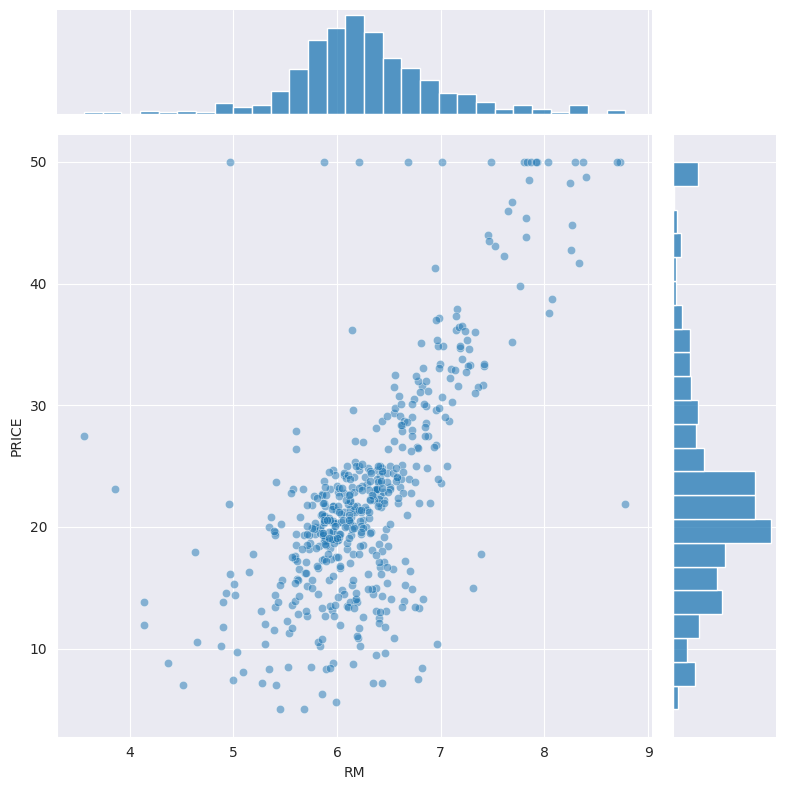

In [32]:
# creating jointplot for RM vs PRICE

with sns.axes_style("darkgrid"):
  fig = sns.jointplot(data= data, x="RM", y="PRICE", kind="scatter",joint_kws={'alpha':0.5}, height=8)


# Split Training & Test Dataset

We *can't* use all 506 entries in our dataset to train our model. The reason is that we want to evaluate our model on data that it hasn't seen yet (i.e., out-of-sample data). That way we can get a better idea of its performance in the real world.

**Challenge**

* Import the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn
* Create 4 subsets: X_train, X_test, y_train, y_test
* Split the training and testing data roughly 80/20.
* To get the same random split every time you run your notebook use `random_state=10`. This helps us get the same results every time and avoid confusion while we're learning.


Hint: Remember, your **target** is your home PRICE, and your **features** are all the other columns you'll use to predict the price.


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
data.sample(1)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
72,72,0.09,0.00,10.81,0.00,0.41,6.07,7.80,5.29,4.00,305.00,19.20,390.91,5.52,22.80


In [35]:
# since we need to allocate the virables and then target, we are now going to split PRICE column as target and rest other columns as variabels
variables= data.drop("PRICE", axis=1)
target = data["PRICE"]

In [36]:
# Splitting the dataset into training and testing sets using train_test_split function
# Variables represent input features, while the target represents the output or dependent variable
# test_size=0.2 allocates 20% of the data to the testing set (X_test, y_test)
# train_size=0.8 sets the training set size to 80% (X_train, y_train)
# random_state=10 ensures reproducibility by fixing the random seed to 10 for the data splitting process
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.2, train_size=0.8, random_state=10)


In [37]:
# now , lets check the size of our training data. We wanted it to be 80%, we are going to check if it is 80% or not
check_training_size = (len(X_train)/len(data)) *100
print(f"The size of our training data is {check_training_size:.4}%")

The size of our training data is 79.84%


# Multivariable Regression

In a previous lesson, we had a linear model with only a single feature (our movie budgets). This time we have a total of 13 features. Therefore, our Linear Regression model will have the following form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

**Challenge**

Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [38]:
# Importing the LinearRegression class from the Scikit-learn library
from sklearn.linear_model import LinearRegression

# Creating a linear regression model
# An instance of the LinearRegression class is initialized as 'model'
# This model can be used for fitting and predicting based on the provided data

model= LinearRegression()


In [39]:
# fitting the model means training the model based on training data and its target values
trainied_model = model.fit(X_train,y_train)

In [40]:
#checking the accuracy of the trained model for training data
accuracy = model.score(X_train, y_train)
accuracy

0.7508825509460909

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).

**Challenge** Print out the coefficients (the thetas in the equation above) for the features. Hint: You'll see a nice table if you stick the coefficients in a DataFrame.

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room?

In [41]:
coefficient_df = pd.DataFrame(data= model.coef_, index= (data.drop("PRICE", axis=1)).columns, columns=["Coefficient"])
coefficient_df

,Coefficient
Unnamed: 0,-0.00
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.99
NOX,-16.25
RM,3.14
AGE,0.01
DIS,-1.50
RAD,0.32


## * We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
### Answer= Yes, the RM does have positive coefficient.
###---------------------------------------------------------------------------
## * What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
### Answer= It is negative. Yes, it does match my thinking and matches the scatter plot constructed above.
###---------------------------------------------------------------------------

## * Check the other coefficients. Do they have the expected sign?
### Answer= Yes every cofficients have the expected sign.
## * Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room?
### Answer= The coefficient for RM is 3.14, that means the increase in one unit in X increases the value of Y by 3.14.
### Now, there is increase of 1 unit ( 6rooms - 5 rooms). Thus, 6 rooms housign is 3.14 * 1000 times expensive than 5 rooms housing.
### Thus, the value is 3410 USD.

### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```

**Challenge**: Create two scatter plots.

The first plot should be actual values (`y_train`) against the predicted value values:

<img src=https://i.imgur.com/YMttBNV.png height=350>

The cyan line in the middle shows `y_train` against `y_train`. If the predictions had been 100% accurate then all the dots would be on this line. The further away the dots are from the line, the worse the prediction was. That makes the distance to the cyan line, you guessed it, our residuals 😊


The second plot should be the residuals against the predicted prices. Here's what we're looking for:

<img src=https://i.imgur.com/HphsBsj.png height=350>



In [42]:
#okay, it is very important for us to understand how our trained model behaves. It is important to check the accuracy of the model.
# For that, we can using .predict() method to predict the target values of our training data using our training mode.
# We already have the actual taregt values for our training data ( y_train for X_train). So, we can differentiate target values produced by .predict() with real y_train.

#model_predict are the predicted values of the variables based on features
model_predict = model.predict(X_train)
real_difference = y_train - model_predict

In [43]:
y_train

50    19.70
367   23.10
34    13.50
78    21.20
172   23.10
       ... 
320   23.80
15    19.90
484   20.60
125   21.40
265   22.80
Name: PRICE, Length: 404, dtype: float64

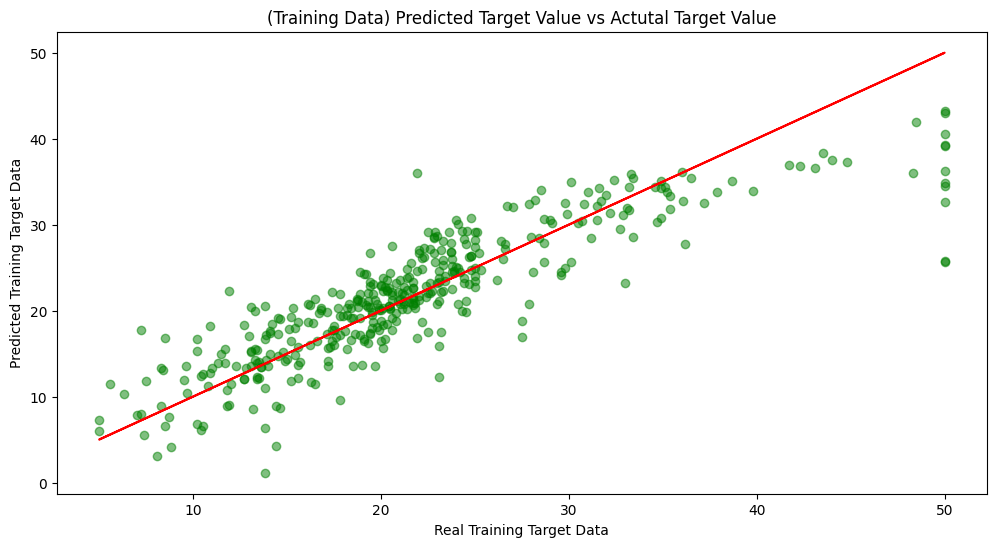

In [44]:
# lets plot actual values (y_train) against the predicted value values:
plt.figure(figsize=(12,6), dpi=100)
plt.title("(Training Data) Predicted Target Value vs Actutal Target Value")
plt.scatter(x=y_train, y= model_predict, c="green", alpha=0.5)
plt.xlabel("Real Training Target Data")
plt.ylabel("Predicted Training Target Data")
plt.plot(y_train, y_train, c="red")

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side. Here's what a normal distribution looks like:

<img src=https://i.imgur.com/7QBqDtO.png height=400>

**Challenge**

* Calculate the mean and the skewness of the residuals.
* Again, use Seaborn's `.displot()` to create a histogram and superimpose the Kernel Density Estimate (KDE)
* Is the skewness different from zero? If so, by how much?
* Is the mean different from zero?

In [45]:
mean = round(real_difference.mean(), 2)
skew =round(real_difference.skew(), 2)


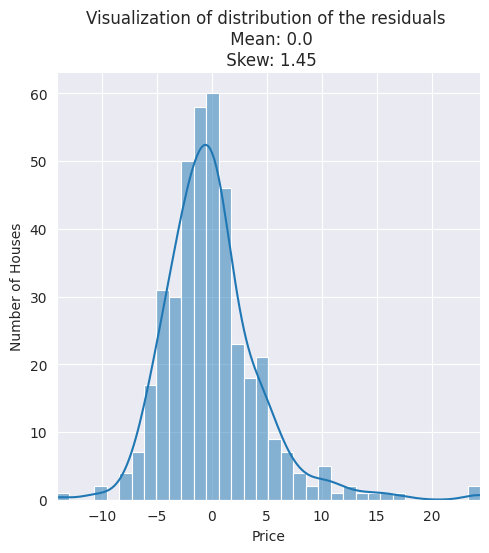

In [46]:
with sns.axes_style("darkgrid"):
  sns.displot(real_difference, kde=True)
  plt.title(f"Visualization of distribution of the residuals \n Mean: {abs(mean)}\n Skew: {abs(skew)}")
  plt.xlabel("Price")
  plt.ylabel("Number of Houses")
  plt.xlim(real_difference.values.min(),real_difference.values.max())

# **The skewness is 1.45. I think we can improve this.**

### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.

**Challenge**

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation.

* Use Seaborn's `.displot()` to show a histogram and KDE of the price data.
* Calculate the skew of that distribution.
* Use [NumPy's `log()` function](https://numpy.org/doc/stable/reference/generated/numpy.log.html) to create a Series that has the log prices
* Plot the log prices using Seaborn's `.displot()` and calculate the skew.
* Which distribution has a skew that's closer to zero?


Text(13.819444444444445, 0.5, 'House Count')

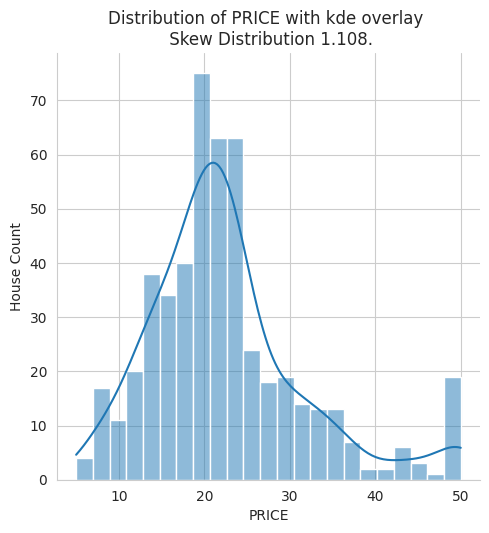

In [47]:
# using displot() showing histogram and KDE of the price data
skew_price =data["PRICE"].skew()
with sns.axes_style("whitegrid"):
  sns.displot(data["PRICE"], kde=True)
plt.title(f"Distribution of PRICE with kde overlay \n Skew Distribution {skew_price:.4}.")
plt.ylabel("House Count")

Text(13.819444444444445, 0.5, 'House Count')

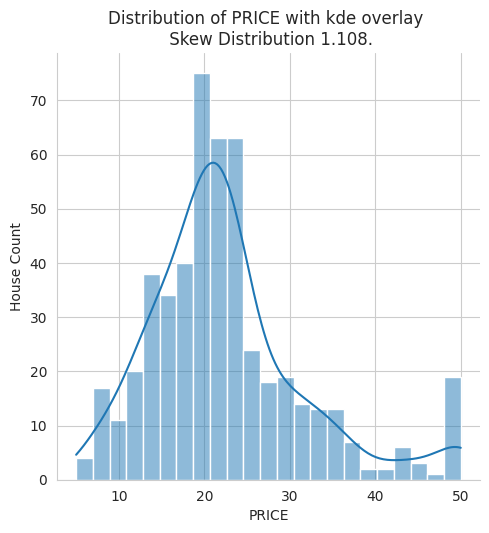

In [48]:
# using displot() showing histogram and KDE of the price data
skew_price =data["PRICE"].skew()
with sns.axes_style("whitegrid"):
  sns.displot(data["PRICE"], kde=True)
plt.title(f"Distribution of PRICE with kde overlay \n Skew Distribution {skew_price:.4}.")
plt.ylabel("House Count")

In [49]:
# log() can be very useful technique when it comes to reduce skewness in data of PRICE.
# it can help to reduce the skewness of the distribution of the data, making it closer to a normal distribution.
# It helps in reducing the scale of the data, especially when the values span a wide range, making it more manageable for analysis.

new_price = data["PRICE"].apply(np.log)
new_price

0     3.18
1     3.07
2     3.55
3     3.51
4     3.59
      ... 
501   3.11
502   3.03
503   3.17
504   3.09
505   2.48
Name: PRICE, Length: 506, dtype: float64

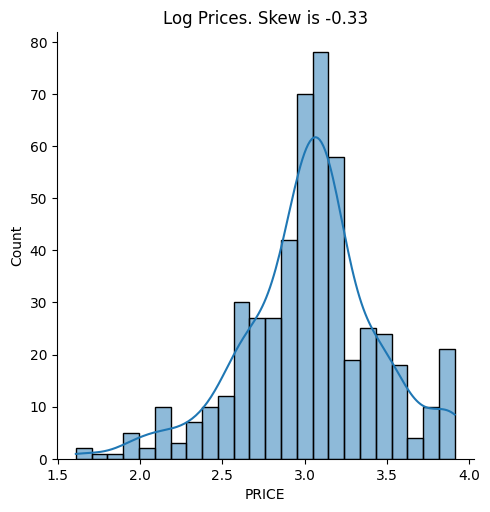

In [50]:
sns.displot(new_price, kde=True)
plt.title(f'Log Prices. Skew is {new_price.skew():.3}')
plt.show()

### Well, after applying log to PRICE column, the skewness is closer to 0 i.e. 0.33 is closer to 0 than 1.108.
###---------------------------------
### Thus, applying log was beneficial.

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset. Here's how the prices are "compressed" by the log transformation:

<img src=https://i.imgur.com/TH8sK1Q.png height=200>

We can see this when we plot the actual prices against the (transformed) log prices.

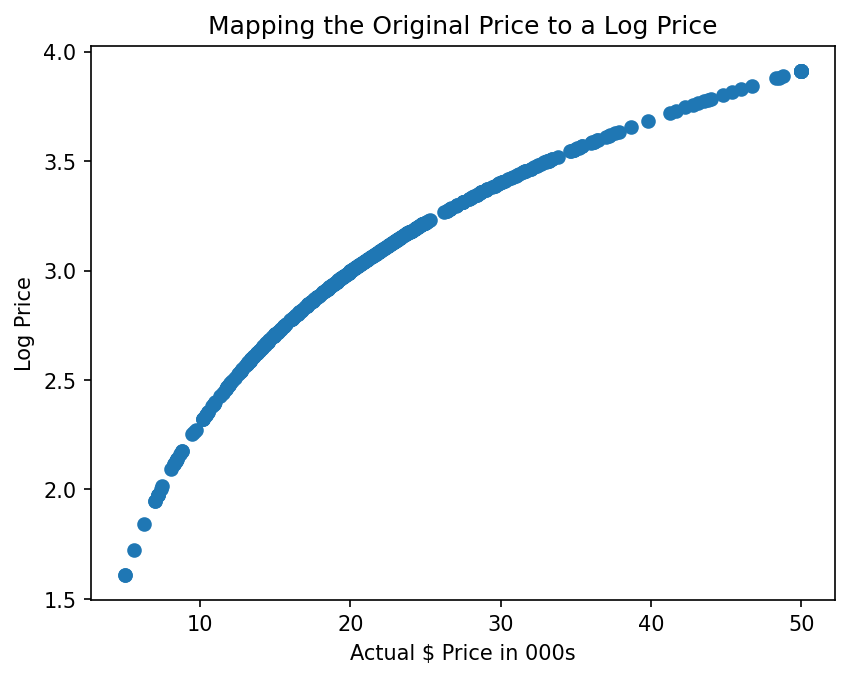

In [51]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Using log prices instead, our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

**Challenge**:

* Use `train_test_split()` with the same random state as before to make the results comparable.
* Run a second regression, but this time use the transformed target data.
* What is the r-squared of the regression on the training data?
* Have we improved the fit of our model compared to before based on this measure?


In [52]:
from sklearn.linear_model import LinearRegression
log_model=LinearRegression()

variables = data.drop("PRICE", axis=1)
target_price = new_price

log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(variables, target_price, test_size=0.2, train_size=0.8, random_state=10)


In [53]:
log_model.fit(log_X_train, log_y_train)

LinearRegression()

In [54]:
predict_result = log_model.predict(X_train)

In [55]:
predict_result

array([3.05238977, 2.66450776, 2.65199891, 3.02881944, 3.10694407,
       2.62663396, 3.35275623, 2.83347833, 2.53035371, 3.00809699,
       3.20891306, 3.34795173, 3.18637598, 2.70320629, 2.77882617,
       2.91647605, 2.75212549, 3.01281851, 3.52909072, 3.34665228,
       2.97993124, 2.61239375, 2.83310132, 3.34154274, 2.55400661,
       3.07326733, 3.12961485, 3.41925017, 3.46248839, 2.08823555,
       3.597596  , 3.20515697, 2.7197289 , 3.20953718, 3.29999779,
       3.5283164 , 2.22678975, 1.83516391, 3.3376417 , 2.47163194,
       2.75030942, 3.01731079, 2.16601203, 2.66923644, 3.57206149,
       3.22895315, 3.16272383, 3.22796856, 2.4129115 , 2.99968128,
       3.53882154, 2.96414634, 2.47574424, 2.86618264, 3.18072508,
       2.45730185, 2.68347149, 3.19842862, 2.44353036, 2.54942709,
       2.85101922, 2.82914051, 3.4655283 , 3.09747645, 3.18845382,
       2.40828372, 3.02575389, 2.25975158, 3.32172877, 2.95961496,
       3.14044972, 3.2908073 , 3.33405045, 2.74334889, 2.45784

In [56]:
print(f"Previous model score: {model.score(X_train,y_train)}")
print(f"New model score after log price: {log_model.score(log_X_train, log_y_train)}")

Previous model score: 0.7508825509460909
New model score after log price: 0.7936937552701595


### We have actually managed to improve our R-Square value this time.
### Previous value: 0.75
### Current_Vale: 0.79

## Evaluating Coefficients with Log Prices

**Challenge**: Print out the coefficients of the new regression model.

* Do the coefficients still have the expected sign?
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher?

Hint: Use a DataFrame to make the output look pretty.

In [57]:
new_coeff = pd.DataFrame(log_model.coef_, index=(data.drop("PRICE",axis=1)).columns, columns=["Coefficient"])
new_coeff

,Coefficient
Unnamed: 0,-0.00
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.02


### As we can see, after using tranformed price for this Regression Model, we still get the coefficient that is logically true and adheres to the previous order. Having negative values asserts that it has negative impact and increase in the number of X, decreases the pricing and vice versa.
###
### For instance, a higher PTRATIO (more students per teacher) shows a negative coefficient. This negative coefficient suggests that a smaller classroom size, represented by a lower PTRATIO, is associated with better education quality. Therefore, a negative coefficient for PTRATIO indicates a favorable association between smaller classroom sizes and higher education quality.

## Regression with Log Prices & Residual Plots

**Challenge**:

* Copy-paste the cell where you've created scatter plots of the actual versus the predicted home prices as well as the residuals versus the predicted values.
* Add 2 more plots to the cell so that you can compare the regression outcomes with the log prices side by side.
* Use `indigo` as the colour for the original regression and `navy` for the color using log prices.

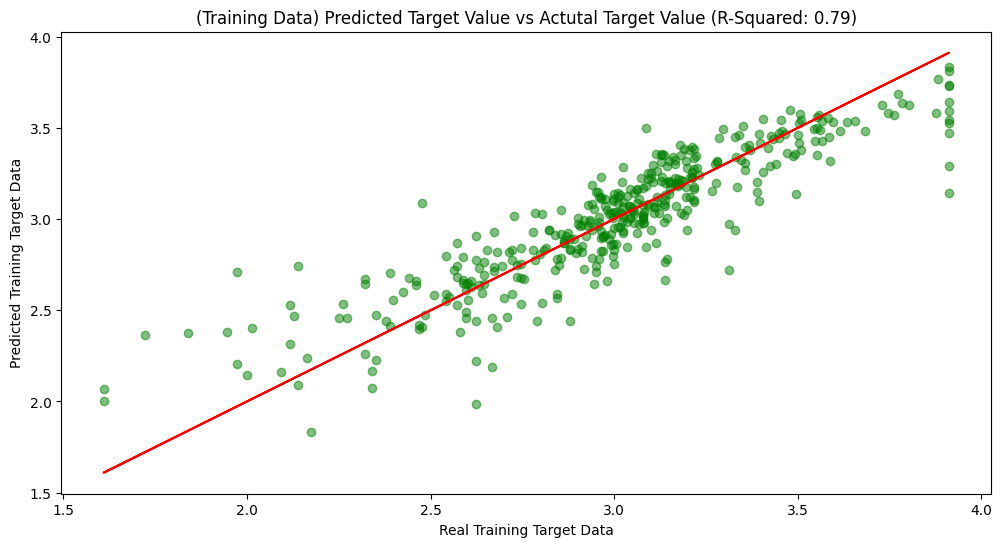

In [58]:
log_real_difference = (log_y_train - predict_result)

log_mean = round(log_real_difference.mean())
log_skew = round(log_real_difference.skew())

# lets plot actual values (y_train) against the predicted value values:
plt.figure(figsize=(12,6), dpi=100)
plt.title("(Training Data) Predicted Target Value vs Actutal Target Value (R-Squared: 0.79)")
plt.scatter(x=log_y_train, y= predict_result, c="green", alpha=0.5)
plt.xlabel("Real Training Target Data")
plt.ylabel("Predicted Training Target Data")
plt.plot(log_y_train, log_y_train, c="red")

### Previous Scatterplot ( (R-Squared: 0.75))
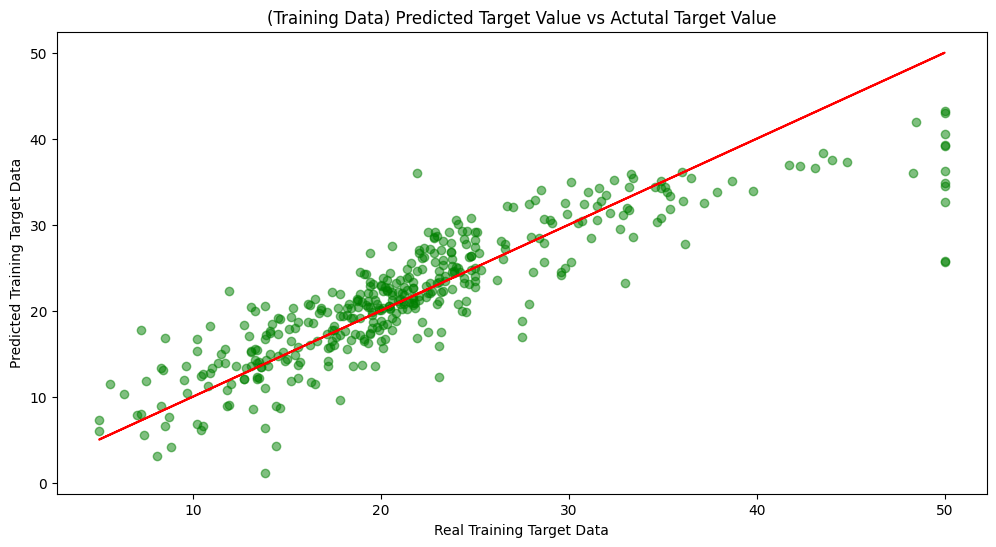

**Challenge**:

Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [65]:
log_residual = log_real_difference.apply(np.log)
new_mean = round(log_real_difference.mean(),2)
new_skew = round(log_real_difference.skew(),3)

0.0
0.102


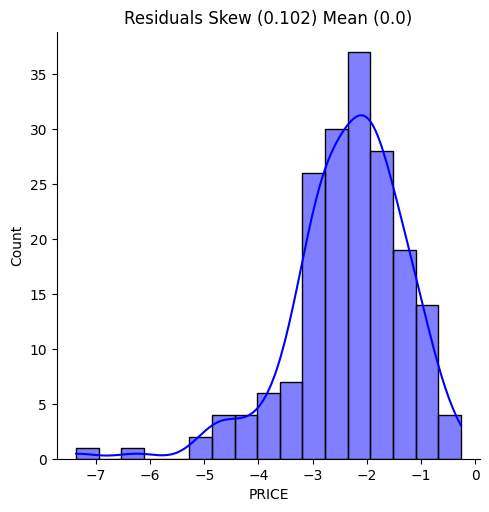

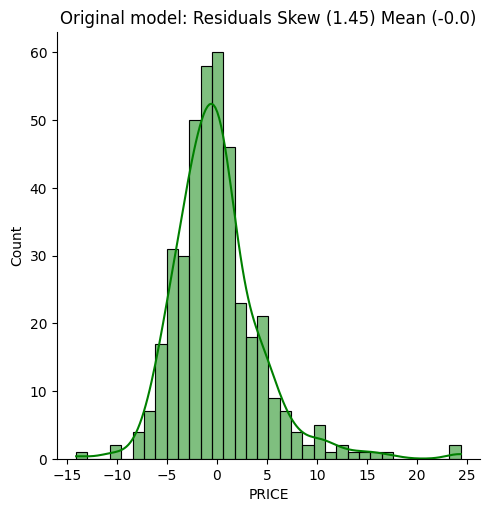

In [66]:
print(new_mean)
print(new_skew)

sns.displot(log_residual, kde=True, color='blue')
plt.title(f'Residuals Skew ({new_skew}) Mean ({new_mean})')
plt.show()

sns.displot(real_difference, kde=True, color='green')
plt.title(f'Original model: Residuals Skew ({skew}) Mean ({mean})')
plt.show()

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet. This is where our `X_test` comes in.

**Challenge**

Compare the r-squared of the two models on the test dataset. Which model does better? Is the r-squared higher or lower than for the training dataset? Why?

In [67]:
unseen_model_test = log_model.score(log_X_test, log_y_test)
unseen_model_test

0.7456049493193999


### -> Previously, when conducting the same test on non-logarithmic data, we achieved an R-Square of 0.67.
### -> Now, we've attained an R-square value of 0.74.
### -> The model hasn't been fine-tuned for the testing data, suggesting performance may be lower than on the training data. Nevertheless, our high R-squared value indicates we've developed a valuable model.

# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [68]:
new_df = data.drop("PRICE", axis=1)
average_df = new_df.mean().values
average_df = pd.DataFrame(data =average_df.reshape(1, len(new_df.columns)), columns= new_df.columns)
average_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,252.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


**Challenge**

Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate? You'll have to [reverse the log transformation with `.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp) to find the dollar value.

In [83]:
price_avg = log_model.predict(average_df)[0]
price_avg_exp = np.exp(price_avg)
print(price_avg)
print(f"The average price is: ${price_avg_exp*1000:.6}")

3.029982498320675
The average price is: $20696.9


**Challenge**

Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [86]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low


In [89]:
# Solution:
average_df['RM'] = nr_rooms
average_df['PTRATIO'] = students_per_classroom
average_df['DIS'] = distance_to_town

if next_to_river:
    average_df['CHAS'] = 1
else:
    average_df['CHAS'] = 0

average_df['NOX'] = pollution
average_df['LSTAT'] = amount_of_poverty

In [90]:
average_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,252.50,3.61,11.36,11.14,1,0.62,8,68.57,5,9.55,408.24,20,356.67,6.95


In [92]:

new_log_prediction = log_model.predict(average_df)[0]
print(f'The new log price valuation is ${new_log_prediction:.3}')

# Convert Log Prices to Acutal Dollar Values
in_dollar = np.e**new_log_prediction * 1000
print(f'House Valuation: ${in_dollar:.6}')

The new log price valuation is $3.25
House Valuation: $25819.9
